### step 1execute from this

### Data collection

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

url="http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry.asp?A=IND"
#url
tables=pd.read_html(url)
#tables #texxt u get
tables[5] #location of table in text is 5
cricket=tables[5] # storing to cricket variable
cricket
#cricket.columns
cricket.columns = cricket.iloc[0]  #removing columns and making first row as column 
cricket = cricket[1:] 
data=pd.DataFrame(cricket)
data #converting to data frame
data.to_csv("test.csv",index=False) #converting to csv file
cd=pd.read_csv("test.csv")    #reading csv file
cd.head(4) 
cd=cd.loc[0:,'Date':'Result'] #by loc indiexing removing unnamed col:0
cd.head(4)                              

,Date,Series,Ground,Result
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn
3,10/02/1934,1933-1934 India v. England,MA Chidambaram Stadium,England won by 202 runs


### Extracting new columns - Year , match,  won_team,     draw,       winnning_runs,  winning_wicckets  and cleaning other data
 ### Regular Expression


In [2]:
 # extracting year from date col

In [3]:
cd['Date'][0]               

'25/06/1932'

In [4]:
re.findall('\d{4}', cd['Date'][0])

['1932']

In [5]:
year_lambda = lambda x: re.findall('\d{4}', x)

In [6]:
cd['Year'] =   cd['Date'].apply(year_lambda)

In [7]:
cd.head(3)

,Date,Series,Ground,Result,Year
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934]


In [8]:
#extracting Match from Series col

In [9]:
cd['Series'][0]

'1932 England v. India'

In [10]:
cd['Series'][323]

'1998-1999 Asian Championship (v. Pakistan)'

In [11]:
re.findall('Asian[\w\s]*\(v\.[\s\w]+\)', cd['Series'][324])

['Asian Championship (v. Sri Lanka)']

In [12]:
re.findall('\s\w+\s\w+\.\s\w+|Asian[\w\s]*\(v\.\s\w+\)|Asian[\w\s]*\(v\.[\s\w]+\)', cd['Series'][324])

['Asian Championship (v. Sri Lanka)']

In [13]:
match_lambda = lambda x: re.findall('\s\w+\s\w+\.\s\w+|Asian[\w\s]*\(v\.\s\w+\)|Asian[\w\s]*\(v\.[\s\w]+\)', x)

In [14]:
cd['Match'] =   cd['Series'].apply(match_lambda)


In [15]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932],[ England v. India]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933],[ India v. England]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934],[ India v. England]


In [16]:
#extracting won_team from Result col

In [17]:
cd['Result'][0]

'England won by 158 runs'

In [18]:
re.findall('^[\w\s]+won', cd['Result'][0])

['England won']

In [19]:
won_lambda = lambda x: re.findall('^[\w\s]+won', x)

In [20]:
cd['won_team'] =   cd['Result'].apply(won_lambda)


In [21]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932],[ England v. India],[England won]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933],[ India v. England],[England won]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934],[ India v. England],[]


In [22]:
#extracting win runs from Result col

In [23]:
cd['Result'][0]

'England won by 158 runs'

In [24]:
re.findall('\d*\sruns', cd['Result'][0])

['158 runs']

In [25]:
won_by_lambda = lambda x: re.findall('\d*\sruns', x)
                                             

In [26]:
cd['win runs'] =   cd['Result'].apply(won_by_lambda)


In [27]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932],[ England v. India],[England won],[158 runs]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933],[ India v. England],[England won],[]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934],[ India v. England],[],[]


In [28]:
#extracting win_wickets from Result col

In [29]:
cd['Result'][7]

'England won by 10 wickets'

In [30]:
re.findall('\s\d+\swickets', cd['Result'][7])

[' 10 wickets']

In [31]:
won_wickets_lambda = lambda x: re.findall('\s\d+\swickets', x)
                                             

In [32]:
cd['win_wickets'] =   cd['Result'].apply(won_wickets_lambda)


In [33]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932],[ England v. India],[England won],[158 runs],[]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933],[ India v. England],[England won],[],[ 9 wickets]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934],[ India v. England],[],[],[]


In [34]:
#extracting match_draw from Result col

In [35]:
cd['Result'][2]

'Match Drawn'

In [36]:
re.findall('^\w+\sDrawn', cd['Result'][2])

['Match Drawn']

In [37]:
draw_lambda = lambda x: re.findall('^\w+\sDrawn', x)
                                             

In [38]:
cd['draw_status'] =   cd['Result'].apply(draw_lambda)


In [39]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets,draw_status
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,[1932],[ England v. India],[England won],[158 runs],[],[]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,[1933],[ India v. England],[England won],[],[ 9 wickets],[]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,[1934],[ India v. England],[],[],[],[Match Drawn]


### cleaning data

In [40]:
#cleaning the data: removing []

cd['Year'] = cd['Year'].apply(lambda x: ''.join(x))
cd['Match'] = cd['Match'].apply(lambda x: ''.join(x))
cd['won_team'] = cd['won_team'].apply(lambda x: ''.join(x))
cd['win runs'] = cd['win runs'].apply(lambda x: ''.join(x))
cd['win_wickets'] = cd['win_wickets'].apply(lambda x: ''.join(x))
cd['draw_status'] = cd['draw_status'].apply(lambda x: ''.join(x))
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets,draw_status
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,158 runs,,
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,,9 wickets,
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,,,Match Drawn


In [41]:
# Again  extracting winning_runs column from win runs column

In [42]:
cd['win runs'][0]

'158 runs'

In [43]:
re.findall('\d+', cd['win runs'][0])

['158']

In [44]:
runs_lambda = lambda x: re.findall('\d+', x)
                                             

In [45]:
cd['winning_runs'] =   cd['win runs'].apply(runs_lambda)
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets,draw_status,winning_runs
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,158 runs,,,[158]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,,9 wickets,,[]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,,,Match Drawn,[]


In [46]:
# extracting winning_wickets column from win_wickets column

In [47]:
cd['win_wickets'][1]

' 9 wickets'

In [48]:
re.findall('\d+', cd['win_wickets'][1])

['9']

In [49]:
wickets_lambda = lambda x: re.findall('\d+', x)
                                             

In [50]:
cd['winning_wickets'] =   cd['win_wickets'].apply(wickets_lambda)
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,158 runs,,,[158],[]
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,,9 wickets,,[],[9]
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,,,Match Drawn,[],[]


In [51]:
##cleaning the data: removing []


cd['winning_runs'] = cd['winning_runs'].apply(lambda x: ''.join(x))
cd['winning_wickets'] = cd['winning_wickets'].apply(lambda x: ''.join(x))
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,win runs,win_wickets,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,158 runs,,,158,
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,,9 wickets,,,9
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,,,Match Drawn,,


### Exploratory Data Analysis

### Droping columns

In [52]:
#removing extra column and use unique columns only

cd=cd.drop('win runs',axis=1)

In [53]:
cd=cd.drop('win_wickets',axis=1)

In [54]:
#final columns 

cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,,158,
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,,,9
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,Match Drawn,,


In [55]:
#want to convert draw_status  Match Drawn into 1 

def draw(x):
    if x == 'Match Drawn':
        return 1

In [56]:
cd['draw_status']=cd['draw_status'].apply(draw)

In [57]:
cd.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,NaN,158,
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,NaN,,9
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,,1.0,,


In [58]:
cd.to_csv('test.csv',index=False)

### saving to csv

In [59]:
# here saving all data to csv into df variable
df=pd.read_csv('test.csv')


In [60]:
df.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,NaN,158.0,NaN
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,NaN,NaN,9.0
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,NaN,1.0,NaN,NaN


In [61]:
#filling null values with 0 zero

df.fillna(0, inplace=True)

In [62]:
df.head(3)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,0.0,158.0,0.0
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,0.0,0.0,9.0
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,0,1.0,0.0,0.0


In [63]:
df.info() #we assume float data types for draw_status,  winning_runs,   winning_wickets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             569 non-null    object 
 1   Series           569 non-null    object 
 2   Ground           569 non-null    object 
 3   Result           569 non-null    object 
 4   Year             569 non-null    int64  
 5   Match            569 non-null    object 
 6   won_team         569 non-null    object 
 7   draw_status      569 non-null    float64
 8   winning_runs     569 non-null    float64
 9   winning_wickets  569 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 44.6+ KB


In [64]:
#converting float data into int data  

#df['col'] = df['col'].astype(int)
#df['col'] = df['col'].astype('int64')#for specified int64

df['draw_status'] = df['draw_status'].astype('int64')
df['winning_runs'] = df['winning_runs'].astype('int64')
df['winning_wickets'] = df['winning_wickets'].astype('int64')






df.head(5)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,0,158,0
1,15/12/1933,1933-1934 India v. England,Gymkhana Ground,England won by 9 wickets,1933,India v. England,England won,0,0,9
2,05/01/1934,1933-1934 India v. England,Eden Gardens,Match Drawn,1934,India v. England,0,1,0,0
3,10/02/1934,1933-1934 India v. England,MA Chidambaram Stadium,England won by 202 runs,1934,India v. England,England won,0,202,0
4,27/06/1936,1936 England v. India,Lord's,England won by 9 wickets,1936,England v. India,England won,0,0,9


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             569 non-null    object
 1   Series           569 non-null    object
 2   Ground           569 non-null    object
 3   Result           569 non-null    object
 4   Year             569 non-null    int64 
 5   Match            569 non-null    object
 6   won_team         569 non-null    object
 7   draw_status      569 non-null    int64 
 8   winning_runs     569 non-null    int64 
 9   winning_wickets  569 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 44.6+ KB


In [66]:
df.to_csv('test.csv',index=False)

In [67]:
df=pd.read_csv('test.csv')

#saving to csv again bcoz i want int64 values for float values
#we can understand 0 - nan val
#1 or any digit  means containing value

In [68]:
df.head(1)

,Date,Series,Ground,Result,Year,Match,won_team,draw_status,winning_runs,winning_wickets
0,25/06/1932,1932 England v. India,Lord's,England won by 158 runs,1932,England v. India,England won,0,158,0


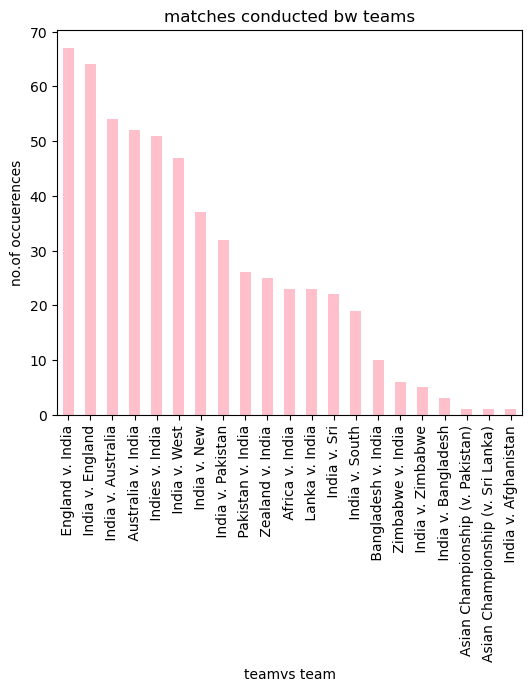

In [69]:
# univarient bar chart for matches
# To know no of matches conducted bw teams team vs team


df['Match'] = df['Match'].astype(str)  # convert the 'won_team' column to string
plt.figure(figsize=(6, 5))             # plot the value counts in a bar plot
df['Match'].value_counts().plot(kind='bar', color='pink')
plt.title("matches conducted bw teams")
plt.xlabel("teamvs team")
plt.ylabel("no.of occuerences")
plt.show()

1.**observation: The bar plot shows that England and India have played the most num of matches against each other
                 the next most num of match-up is between India and England and there are some cases where only one match has                    played between two team India vs Afganisthan

In [70]:
#to know no of times team won

# convert the 'won_team' column to string
df['won_team'] = df['won_team'].astype(str)
d1=df.loc[(df['won_team']!='0')]
d1['won_team']

0        England won
1        England won
3        England won
4        England won
6        England won
           ...      
563        India won
564        India won
565        India won
566        India won
567    Australia won
Name: won_team, Length: 347, dtype: object

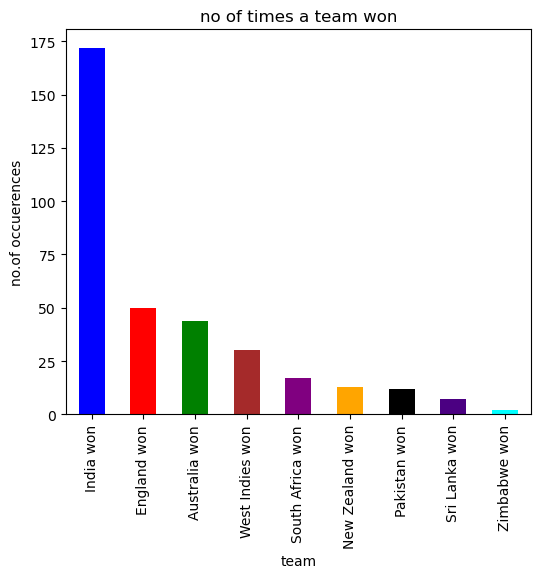

In [71]:
#univarient barchart for won_team count
# plot the value counts in a bar chart
plt.figure(figsize=(6, 5))
d1['won_team'].value_counts().plot(kind='bar',color=['blue','red','green','brown','purple','orange','black','indigo','cyan','pink'])
plt.title('no of times a team won')
plt.xlabel("team")
plt.ylabel("no.of occuerences")
plt.show()

2.**observation :The bar plot shows India has won most of the matches and srilanka,Zimbabwe has won least num of matches

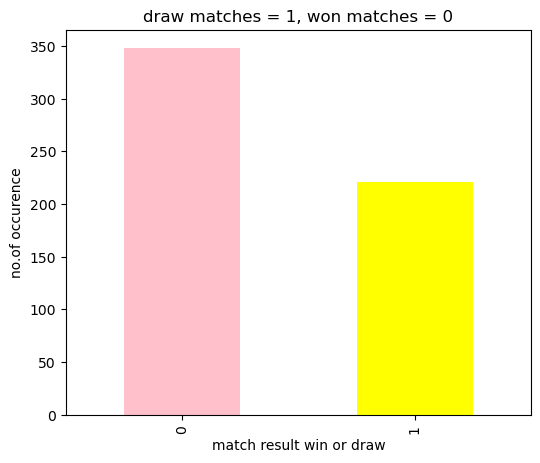

In [72]:

#univarient barchart for draw_status

# convert the 'draw_status' column to string
df['draw_status'] = df['draw_status'].astype(str)

# plot the value counts in a bar plot
plt.figure(figsize=(6, 5))
df['draw_status'].value_counts().plot(kind='bar', color=['pink','yellow'])
plt.title("draw matches = 1, won matches = 0")
plt.xlabel("match result win or draw")
plt.ylabel("no.of occurence")
plt.show()

#as per col 1 means draw 0 means nan value

3.**observation:This bar plot shows won matches are greater than drawn matches

In [73]:
wruns=df[df['winning_runs']!=0]
#wruns

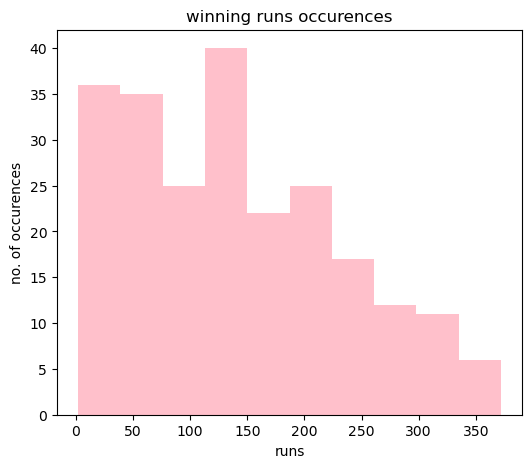

In [74]:
#univarient histgram for winning_runs

plt.figure(figsize=(6, 5))
plt.hist(wruns['winning_runs'],color='pink')
plt.xlabel("runs")
plt.ylabel("no. of occurences")
plt.title("winning runs occurences")
plt.show()

4.**Observation:The histogram shows  most of the winning runs in the range of 0 to 150 runs 
                and the histogram is skewed to the right it  means   less occurence of lower winning runs 
                and more occurrences of higher winning runs.



In [75]:
wwick=df[df['winning_wickets']!=0]
#wwick

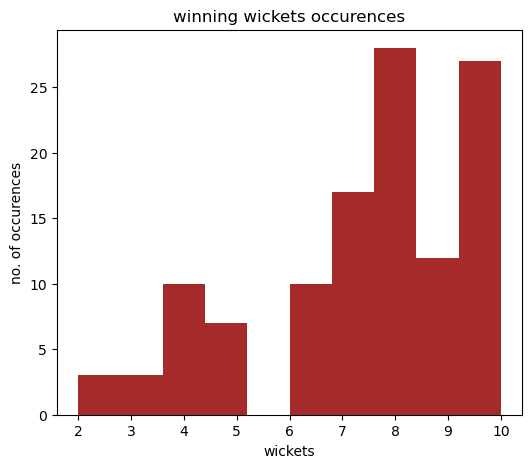

In [76]:
plt.figure(figsize=(6, 5))
plt.hist(wwick['winning_wickets'],color='brown')
plt.xlabel("wickets")
plt.ylabel("no. of occurences")
plt.title("winning wickets occurences")
plt.show()

5.**Observation:The histogram shows  distribution of winning wickets is skewed to the right ,
                it represents that winning by  8-10 wickets is more  than winning by 1-5 wickets
                

In [77]:
year=df['Year'].value_counts()[0:10]
year.head(10)

1983    18
1979    17
2002    16
2008    15
2010    14
2021    14
2018    14
2001    13
2016    12
2006    12
Name: Year, dtype: int64

In [78]:
df['won_team'].value_counts()
# 0 means draw this col sho

0                   222
India won           172
England won          50
Australia won        44
West Indies won      30
South Africa won     17
New Zealand won      13
Pakistan won         12
Sri Lanka won         7
Zimbabwe won          2
Name: won_team, dtype: int64

In [79]:
df['won_team'] = df['won_team'].astype(str)
d1=df.loc[(df['won_team']!='0')]
d1['won_team']

0        England won
1        England won
3        England won
4        England won
6        England won
           ...      
563        India won
564        India won
565        India won
566        India won
567    Australia won
Name: won_team, Length: 347, dtype: object

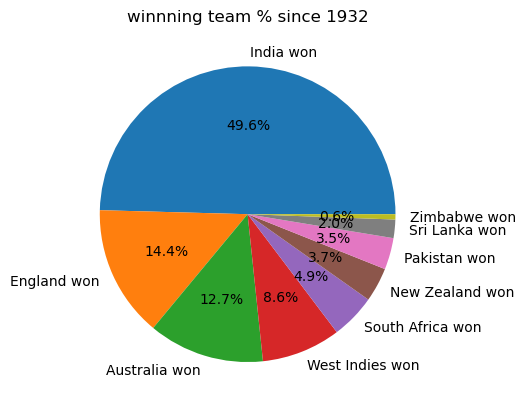

In [80]:
#univarient pie chart for won_team %

win_counts = d1['won_team'].value_counts()

# create a pie chart
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%')
plt.title('winnning team % since 1932')
plt.show()

**6.Observation :The pie chart shows India has won most of the matches with the percentage 49.6%
                 second followd by  England 14.4% and Zimbabwe has won least num of matches with percentage 0.6%

In [81]:
df['Series'].value_counts()[0:20]

1983-1984 India v. West Indies    6
1982-1983 Pakistan v. India       6
1981-1982 India v. England        6
1979-1980 India v. Pakistan       6
1979-1980 India v. Australia      6
1978-1979 India v. West Indies    6
2021 England v. India             5
1976-1977 India v. England        5
1972-1973 India v. England        5
2001-2002 West Indies v. India    5
1974-1975 India v. West Indies    5
2016-2017 India v. England        5
2018 England v. India             5
1996-1997 West Indies v. India    5
1977-1978 Australia v. India      5
1969-1970 India v. Australia      5
1991-1992 Australia v. India      5
1982-1983 West Indies v. India    5
1984-1985 India v. England        5
1986-1987 India v. Pakistan       5
Name: Series, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Density'>

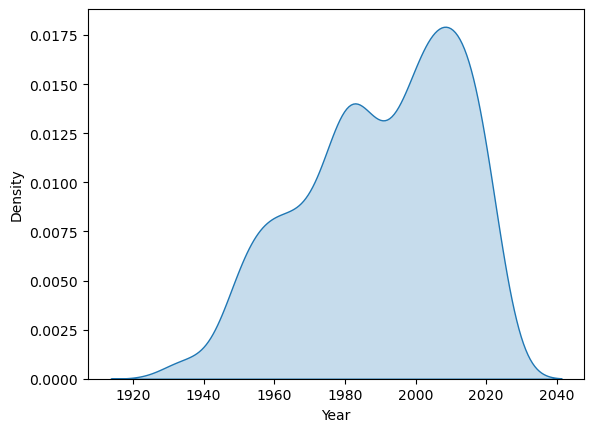

In [82]:
#univarient kde plot for which year matches are conducted more?   
sns.kdeplot(x='Year', data=df, shade=True)

**7.Observation: The plot shows distribution of matches across different years
                 The peak of the curve shows around the mid-2000s more matches were played during this period 
                 when compared to other years.

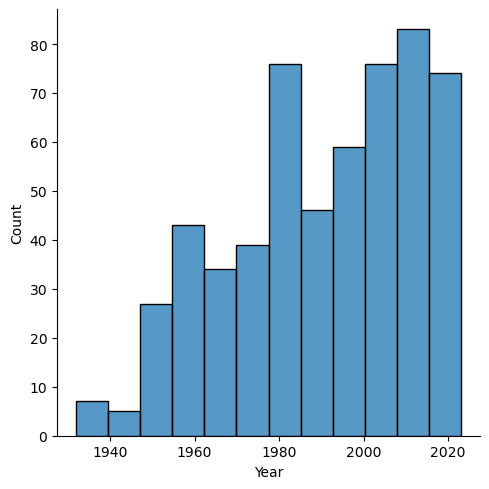

In [83]:
#Univarient know from which year matches are conducted more?
sns.displot(x='Year',data=df)

**7.Observation: The plot shows distribution of matches across different years
                 The peak of the curve shows around the mid-2000s more matches were played during this period 
                 when compared to other years.

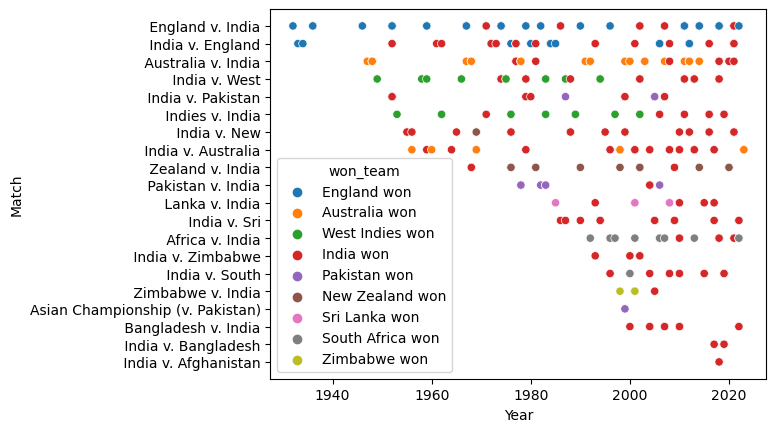

In [84]:
# multivarient to know in which year matches are conducted and which team won 
df_filtered = df[df['won_team'] != '0']
sns.scatterplot(data=df_filtered, x="Year", y="Match", hue="won_team")
plt.show()

**8.Observation:The scatter plot shows India won majority of matches in series b/w teams
few matches are conducted during the period of 1932-1940

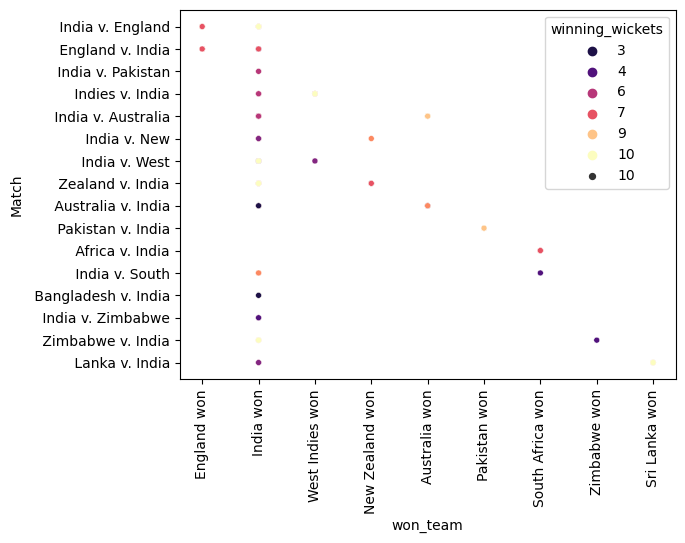

In [85]:
# multivarient to know  matches bw teams and won team with wickets 
df2_filtered = df[(df['winning_wickets'] != 0) & (df['won_team'] != 0)]
sns.scatterplot(data=df2_filtered, x="won_team", y="Match", hue="winning_wickets", size=10,palette='magma')
plt.xticks(rotation=90)# Rotate the x-axis labels vertically
plt.show()

**9.Observation: if we observe this scatter plot shows England won matches with 7 wickets and India won most matches with 10 &6 wickets

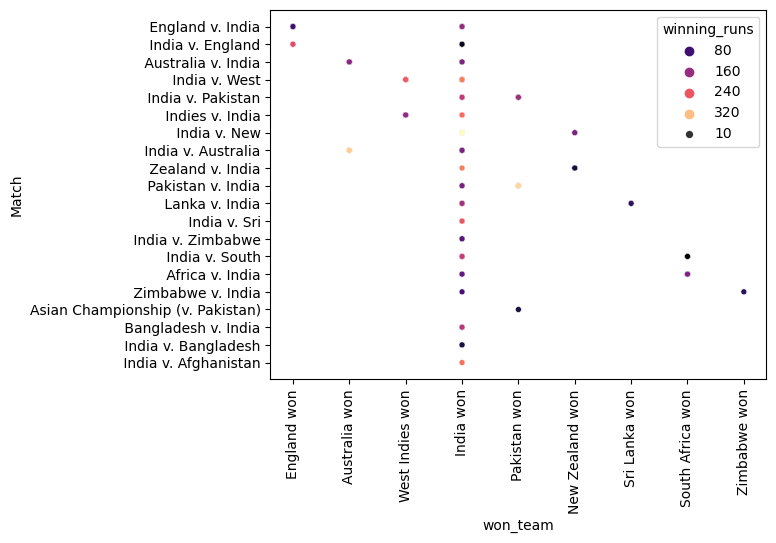

In [86]:
#multivarient to know  matches bw teams and won team with runs
df3_filtered = df[(df['winning_runs'] != 0) & (df['won_team'] != 0)] # Create the scatter plot
sns.scatterplot(data=df3_filtered, x="won_team", y="Match", hue="winning_runs", size=10,palette='magma')
plt.xticks(rotation=90)# Rotate the x-axis labels vertically
plt.show()

**10.Observation:if we observe this scatter plot shows England won matches win runs with 80 runs 240 runs early
                 and India won most matches with 10,320,240,80,160 

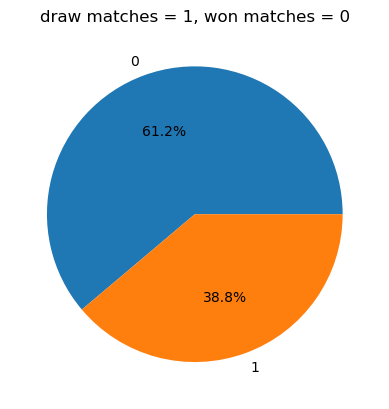

In [87]:
#univarient
draw_status= df['draw_status'].value_counts()
# create a pie chart
plt.pie(draw_status, labels=draw_status.index, autopct='%1.1f%%')
plt.title("draw matches = 1, won matches = 0")
plt.show()

**11.Observation:  The pie chart shows 61.2% matches are won matches and 38.8% matches are drawn

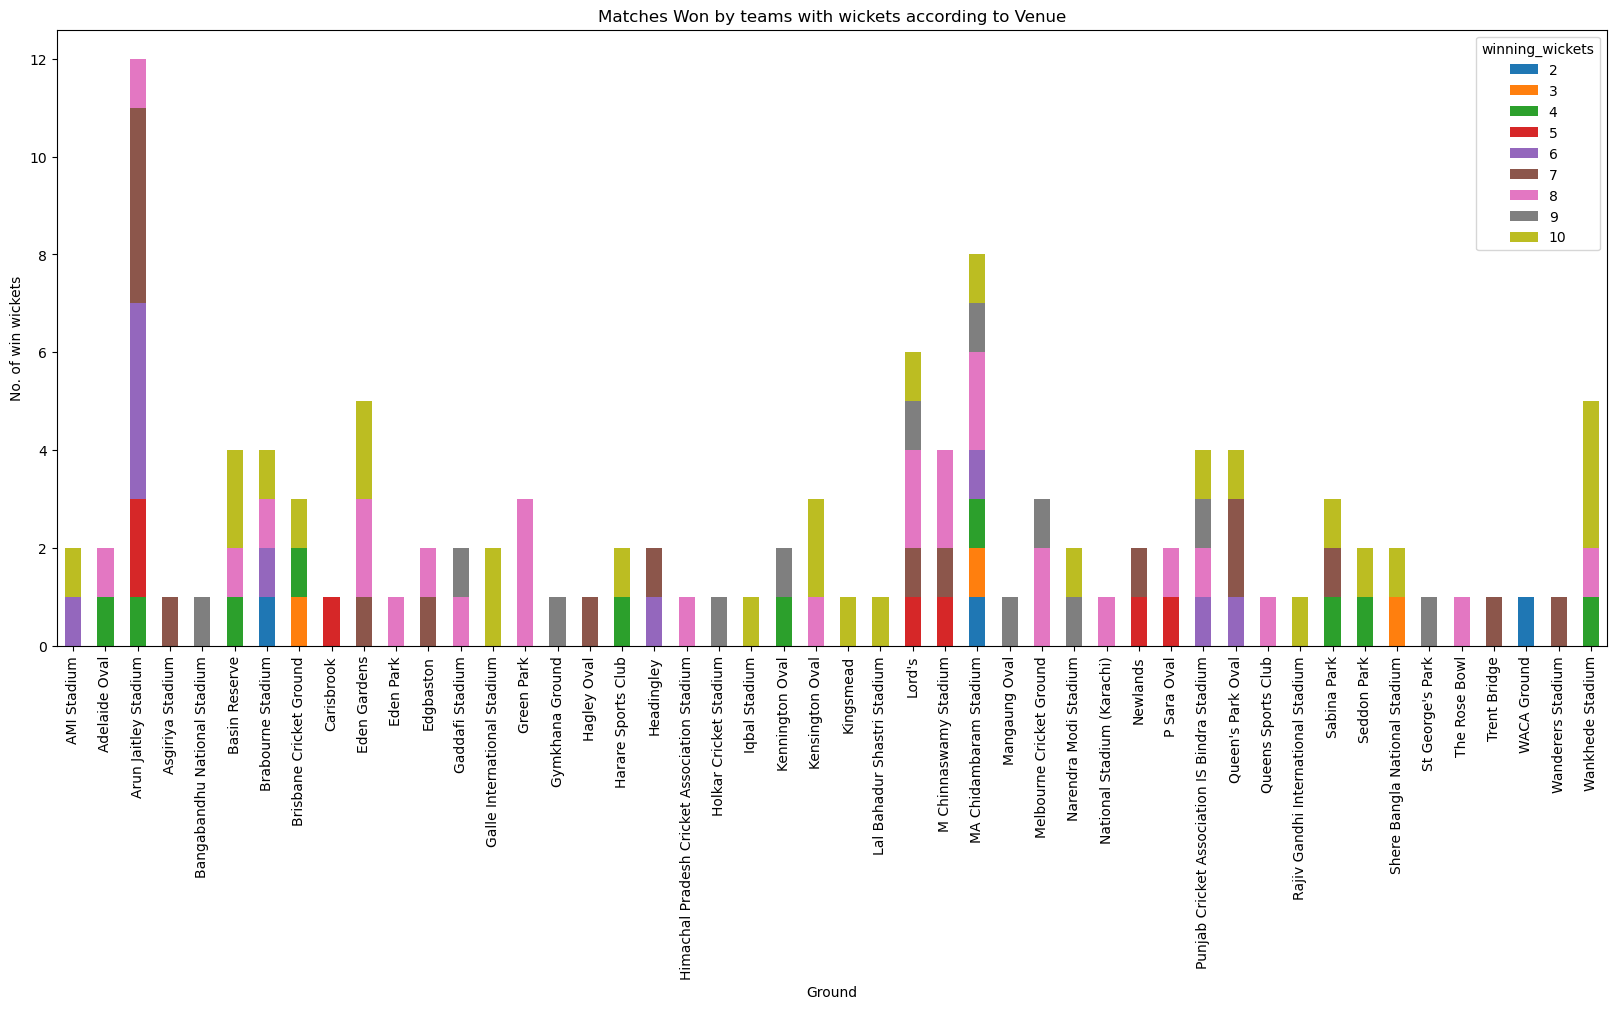

In [88]:
#Bivarient for Ground, 'winning_wickets

dfff_filtered = df[df['winning_wickets'] != 0]

# Group the DataFrame by Ground and winning_wickets columns and get the size of each group
grouped = dfff_filtered.groupby(['Ground', 'winning_wickets']).size().unstack()

# Create the bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(20,8))

# Set the y-axis label and plot title
ax.set_ylabel('No. of win wickets')
ax.set_title('Matches Won by teams with wickets according to Venue')

# Show the plot
plt.show()

**12.Observation:  The bar plot shows most of matches won at Arun jaitley stadium & MA Chidambaram Stadium
                   and we observe most of matches win with wickets 10

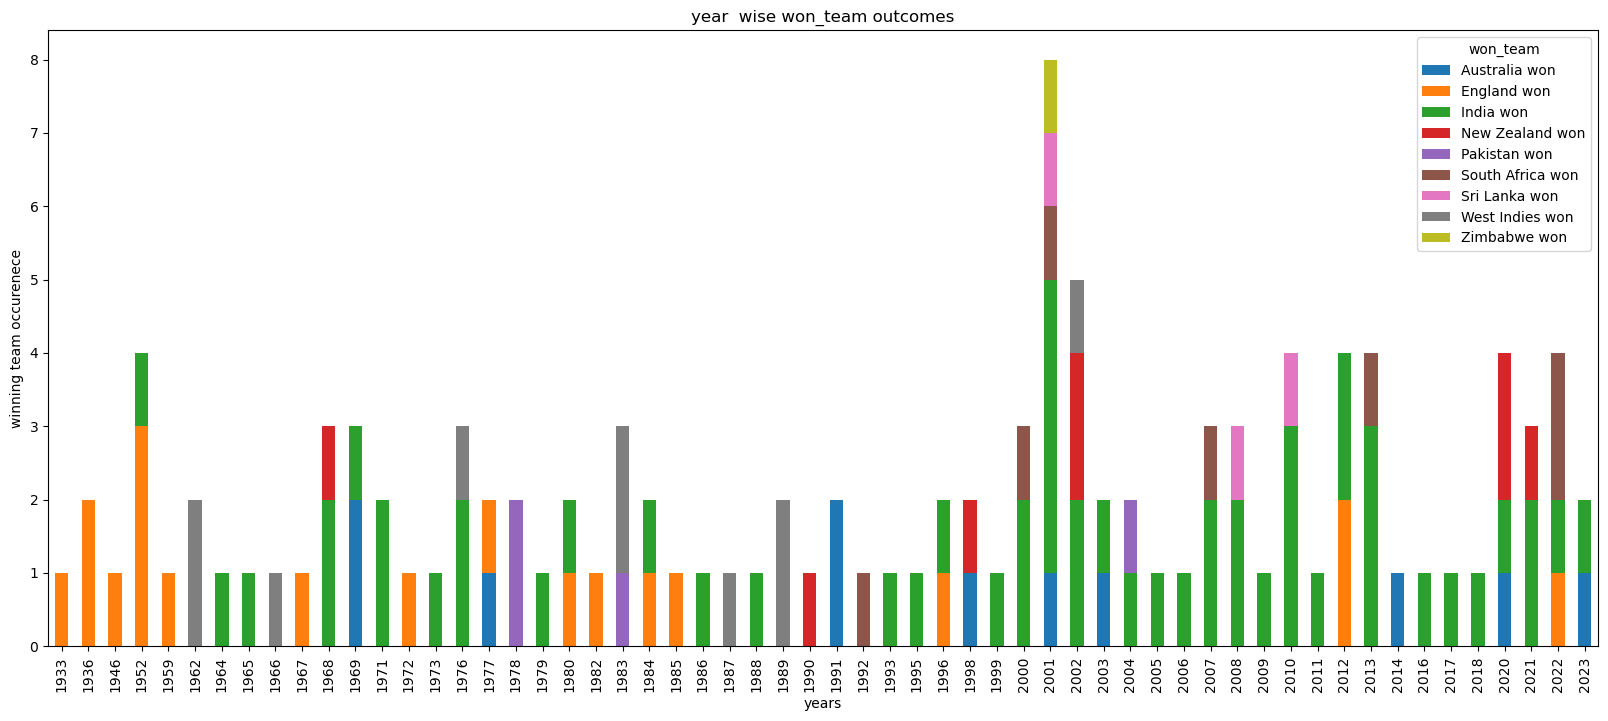

In [89]:
# Bivarient To know winning team as according year using grouping
#barplot used


dfff_filtered = df[df['winning_wickets'] != 0]

grouped = dfff_filtered.groupby(['Year', 'won_team']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(20,8))
ax.set_ylabel('winning team occurenece')
ax.set_xlabel("years")
ax.set_title('year  wise won_team outcomes')
plt.show()

**13.Observation:  if we observe this bar chart most of the series conducted from year 2001 -2023's most of matches won by India

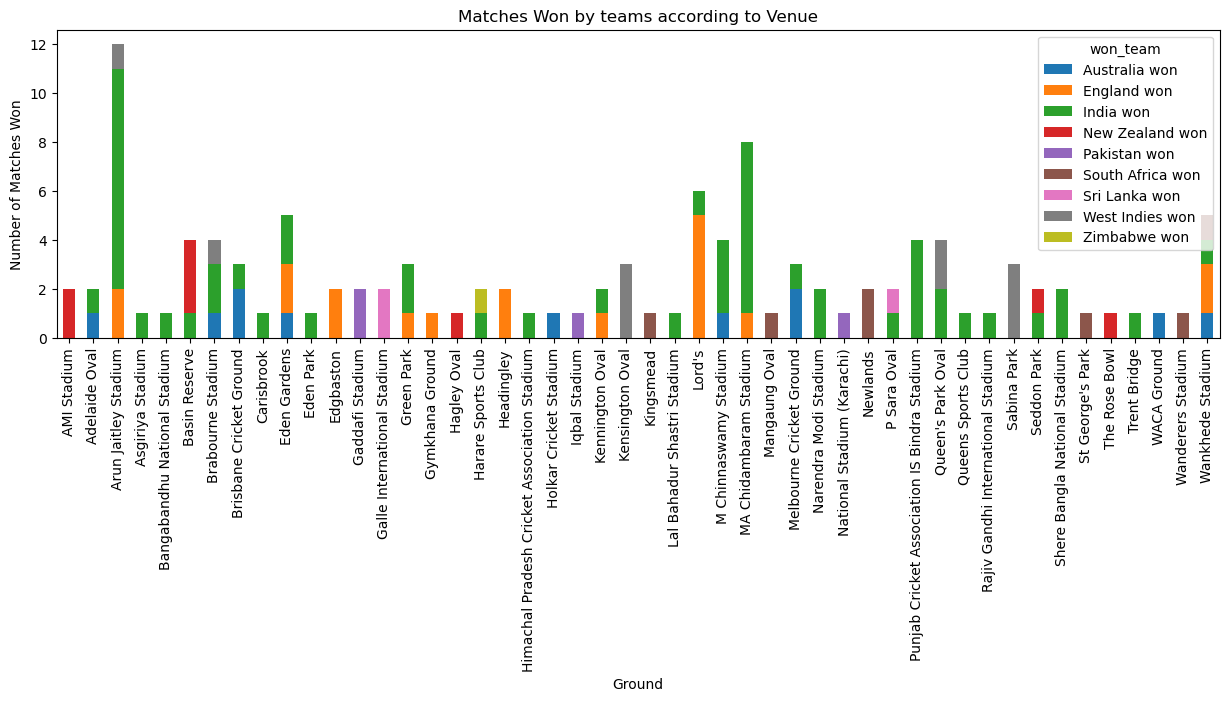

In [90]:
#Bivarient  #barplot to know winning team as per ground using grouping
dffff_filtered = df[df['winning_wickets'] != 0]
grouped = dffff_filtered.groupby(['Ground', 'won_team']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True, figsize=(15,4))
ax.set_ylabel('Number of Matches Won')
ax.set_xlabel('Ground')
ax.set_title('Matches Won by teams according to Venue')
plt.show()

**14.Observation:  if we observe this bar ,matches according to grounds and won team respective to ground

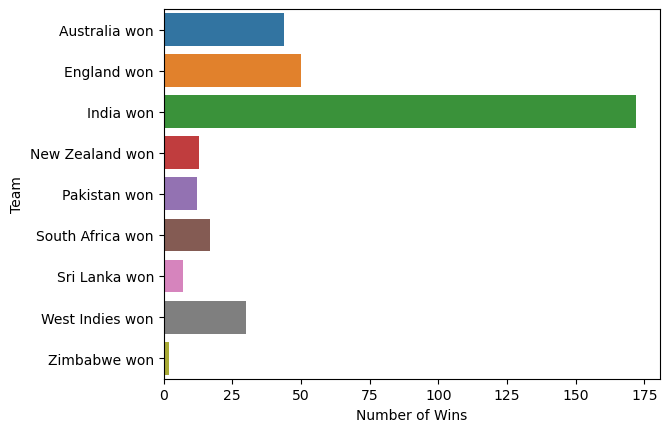

In [91]:
#univarient

dfs_filtered = df[df['won_team'] != '0']

# Group the filtered DataFrame by won_team and count the number of wins for each team
team_wins = dfs_filtered.groupby("won_team")["won_team"].count().reset_index(name="wins")

# Create the bar plot
sns.barplot(data=team_wins, x="wins", y="won_team")

# Set the x-axis and y-axis labels
plt.xlabel("Number of Wins")
plt.ylabel("Team")

# Show the plot
plt.show()

**15.Observation won_team count and teams in alphabetic order

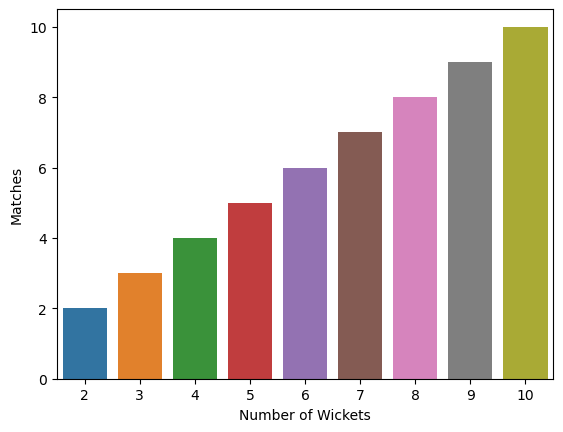

In [92]:
#univarient

ddf_filtered = df[df['winning_wickets'] != 0]

# Group the filtered DataFrame by winning_wickets and find the maximum number of wickets
team_wins = ddf_filtered.groupby("winning_wickets")["winning_wickets"].max().reset_index(name="wickets")

# Create the bar plot
sns.barplot(data=team_wins, x="wickets", y="winning_wickets")

# Set the x-axis and y-axis labels
plt.xlabel("Number of Wickets")
plt.ylabel("Matches")

# Show the plot
plt.show()

**15.Observation wining_wi ckets count 

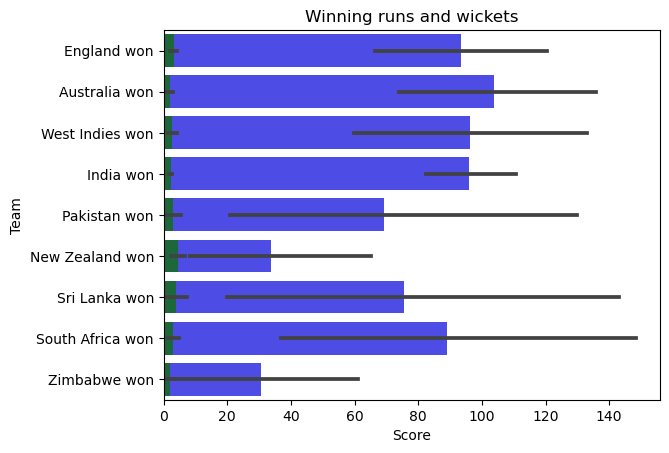

In [93]:
# Bivarient using barplot 
dfss_filtered = df[df['won_team'] != '0']

sns.barplot(y='won_team', x='winning_runs', data=dfss_filtered, color='blue', alpha=0.8)
sns.barplot(y='won_team', x='winning_wickets', data=dfss_filtered, color='green', alpha=0.8)

# add labels and title
plt.xlabel('Score')
plt.ylabel('Team')
plt.title('Winning runs and wickets')

# display chart
plt.show()

<AxesSubplot:>

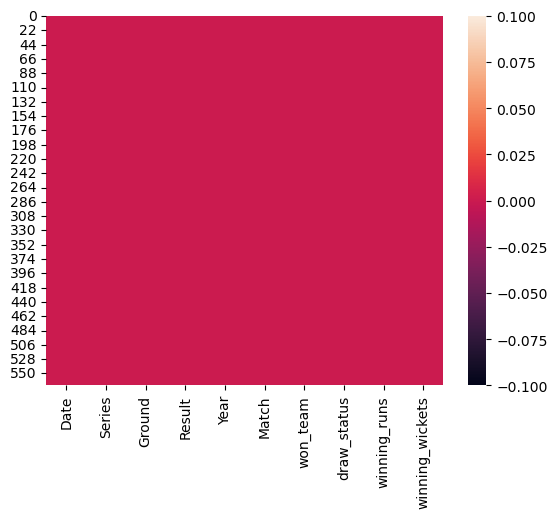

In [94]:
#toc check null values by heat map

sns.heatmap(df.isnull())

Observation:Heatmap shows no null values

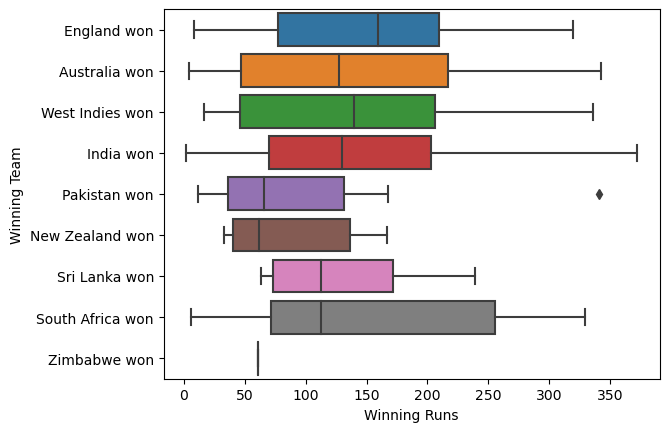

In [95]:
df_filtered = df[(df['winning_runs'] != 0) & (df['won_team'] != 0)]

# create the boxplot
sns.boxplot(x='winning_runs', y='won_team', data=df_filtered)

# set the x and y axis labels
plt.xlabel("Winning Runs")
plt.ylabel("Winning Team")

# show the plot   
plt.show()

Observation:if we observe this boxplot most of teams won with minimum margin of 250_350 runs

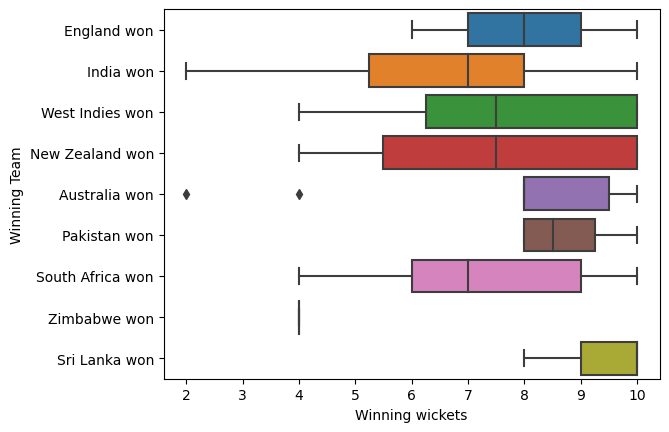

In [96]:
df_filtered = df[(df['winning_wickets'] != 0) & (df['won_team'] != 0)]

# create the boxplot
sns.boxplot(x='winning_wickets', y='won_team', data=df_filtered)

# set the x and y axis labels
plt.xlabel("Winning wickets")
plt.ylabel("Winning Team")

# show the plot
plt.show()

<AxesSubplot:xlabel='count', ylabel='Match'>

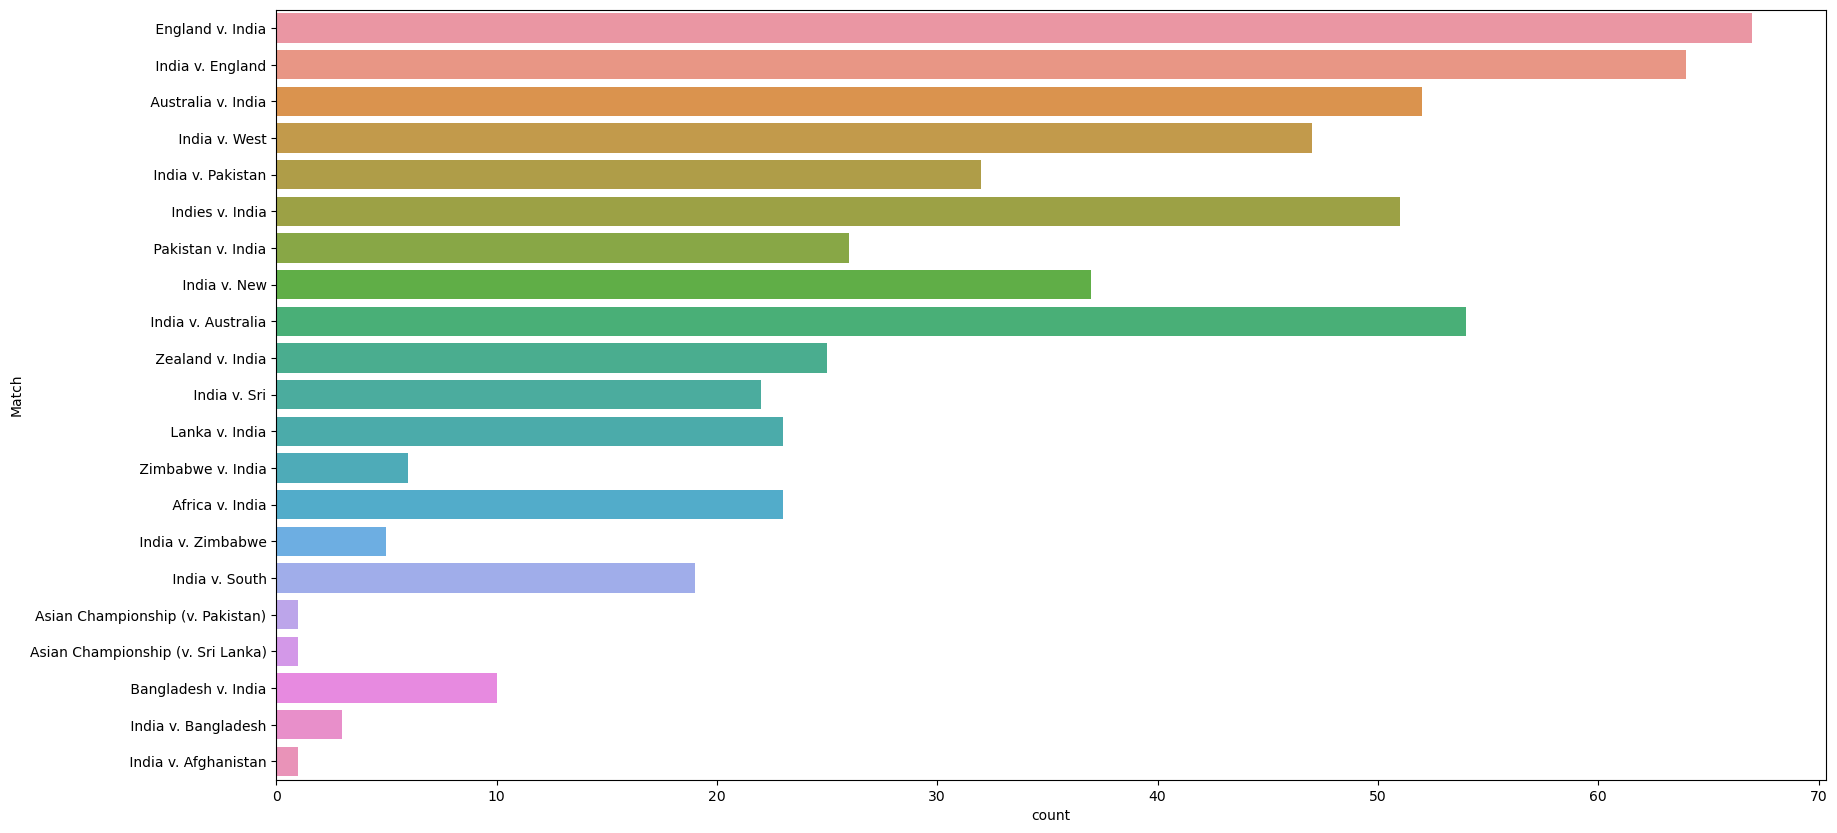

In [97]:
#using count plot 
#determining counnt of matches 

plt.figure(figsize=(20,10))
sns.countplot(y=df.Match)

**Observation:The plot shows most matches occured with the combination of England v India and India v England
and only one match occured with combination of India v Afghanistan    

In [98]:
df.Match.value_counts()

 England v. India                    67
 India v. England                    64
 India v. Australia                  54
 Australia v. India                  52
 Indies v. India                     51
 India v. West                       47
 India v. New                        37
 India v. Pakistan                   32
 Pakistan v. India                   26
 Zealand v. India                    25
 Africa v. India                     23
 Lanka v. India                      23
 India v. Sri                        22
 India v. South                      19
 Bangladesh v. India                 10
 Zimbabwe v. India                    6
 India v. Zimbabwe                    5
 India v. Bangladesh                  3
Asian Championship (v. Pakistan)      1
Asian Championship (v. Sri Lanka)     1
 India v. Afghanistan                 1
Name: Match, dtype: int64

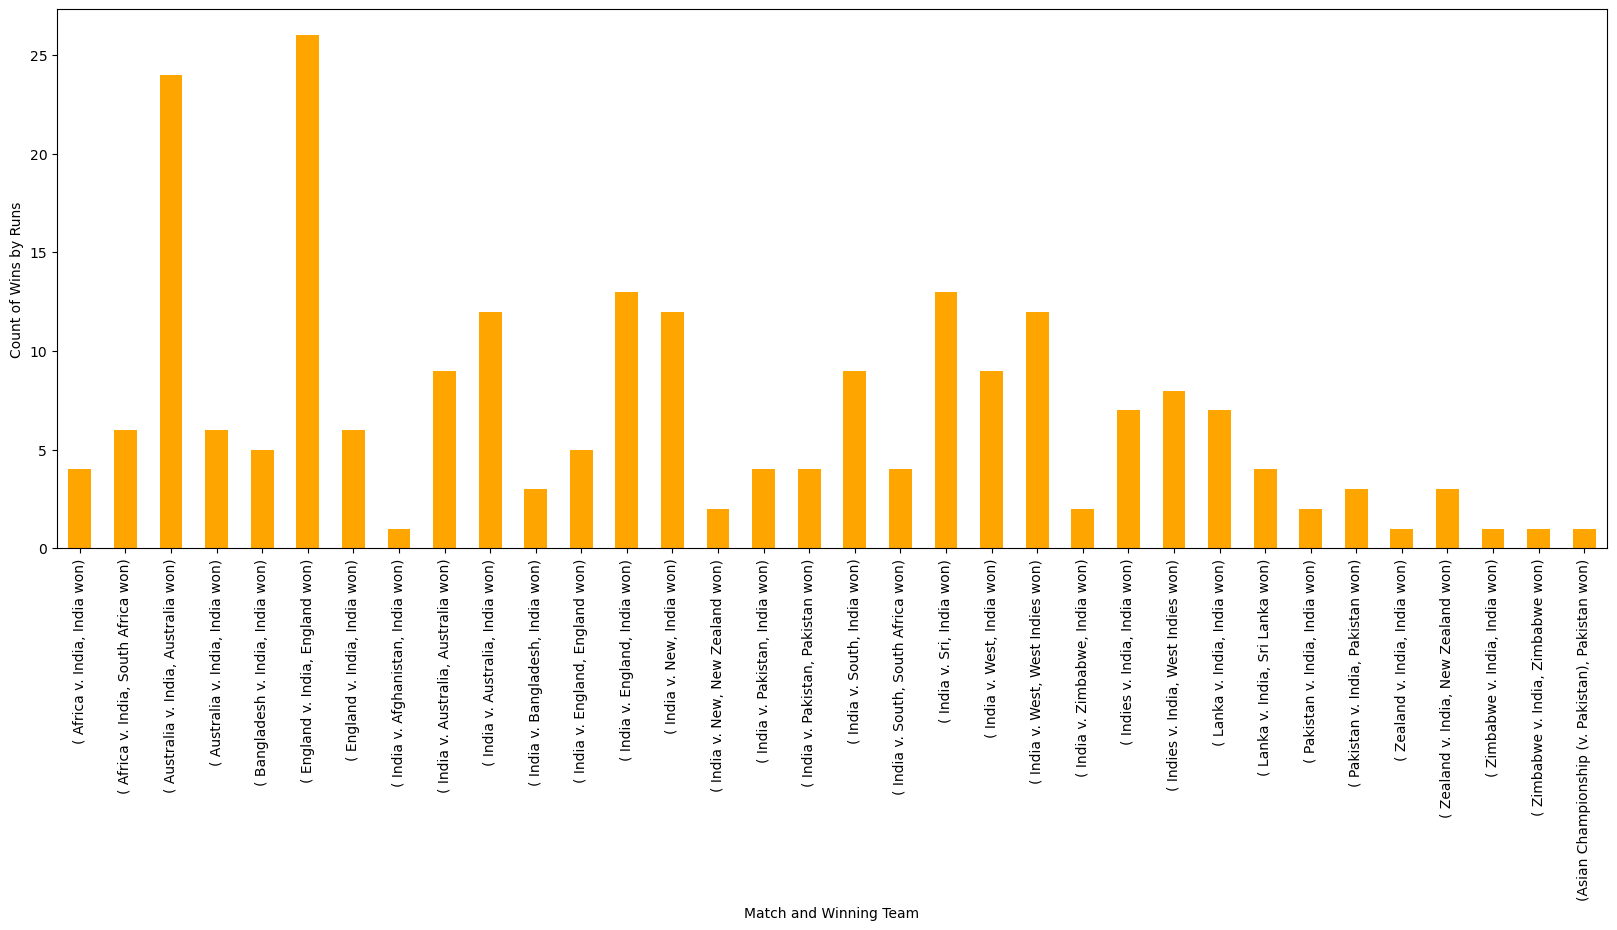

In [99]:
#multi varient
df_filtered = df[(df['winning_runs'] != 0) & (df['won_team'] != 0)]#dataframe by excluding rows where winning_runs&won_team !=0
grouped = df_filtered.groupby(['Match','won_team'])['winning_runs'].count()#groupby Match,won_team&count the no.of wins by runs
grouped.plot(kind='bar', figsize=(20,7), color='orange')# create a bar plot of the counts
plt.xlabel('Match and Winning Team')# set the x and y axis labels
plt.ylabel('Count of Wins by Runs')
plt.show()# show the plot

**Observation: Matches b/w teams and wont team with winning runs count
               here Australia and England are top teams in winning runs counts >20

In [100]:
#correlation for numerical columns like Year,   winning_runs,  winning_wickets

corr = df.corr()
corr

,Year,winning_runs,winning_wickets
Year,1.000000,0.174882,0.042196
winning_runs,0.174882,1.000000,-0.301667
winning_wickets,0.042196,-0.301667,1.000000


<AxesSubplot:xlabel='Year', ylabel='Match'>

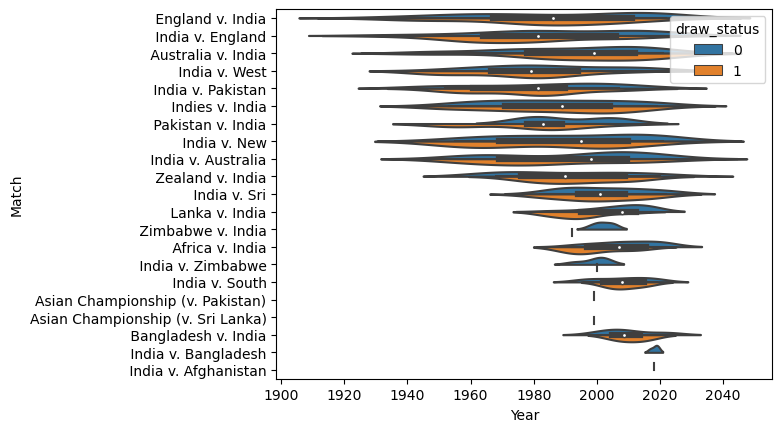

In [101]:
#violinplot
sns.violinplot(x='Year', y='Match', data=df[df['draw_status']!=0], hue='draw_status', split=True, figsize=(1,4))

#sns.violinplot(x='Year', y='Match', data=df, hue='draw_status', split=True,figuresize=(1,4))

<AxesSubplot:xlabel='winning_runs', ylabel='won_team'>

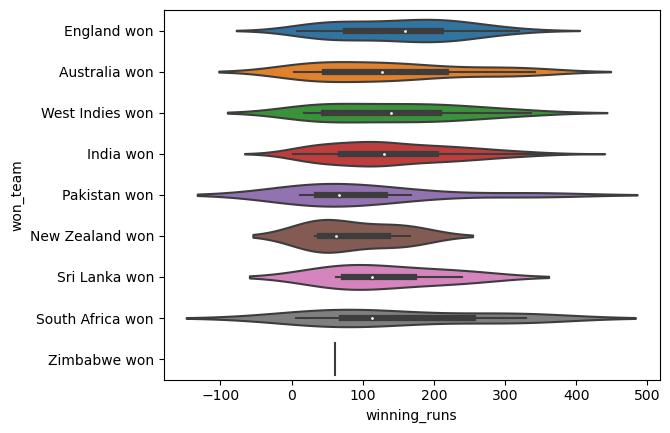

In [102]:
sns.violinplot(x='winning_runs', y='won_team', data=df[(df['winning_runs']!=0) & (df['won_team']!=0)], split=True, figsize=(1,4))


<AxesSubplot:xlabel='winning_wickets', ylabel='won_team'>

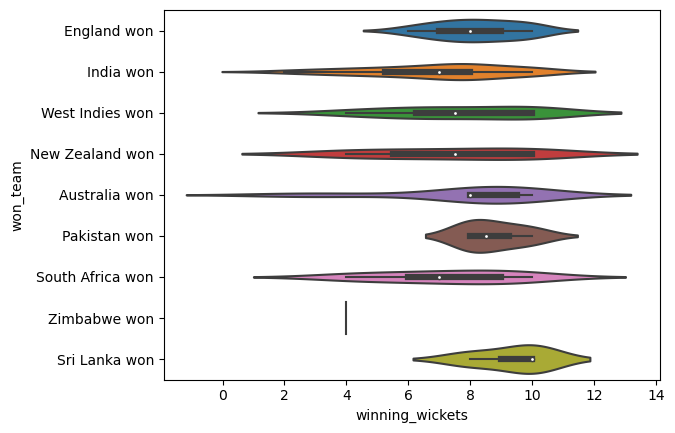

In [103]:
sns.violinplot(x='winning_wickets', y='won_team', data=df[(df['winning_wickets']!=0) & (df['won_team']!=0)], split=True, figsize=(1,4))


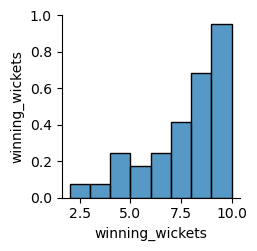

In [104]:

filtered_df = df[df['winning_wickets'] != 0]

# creating a pair plot 

sns.pairplot(filtered_df[['winning_wickets']])

In [105]:
#correlation for numerical columns like Year,   winning_runs,  winning_wickets

corr = df.corr()
corr

,Year,winning_runs,winning_wickets
Year,1.000000,0.174882,0.042196
winning_runs,0.174882,1.000000,-0.301667
winning_wickets,0.042196,-0.301667,1.000000


<AxesSubplot:>

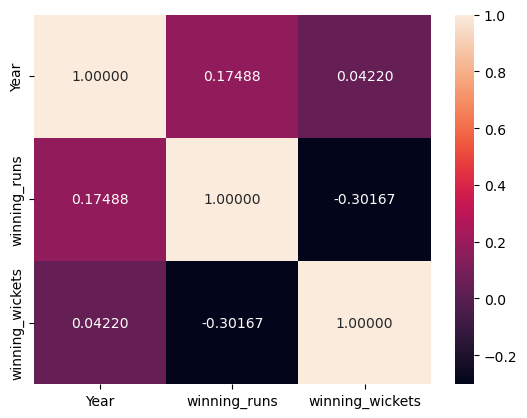

In [106]:
# multi varient for numerical columns
df.corr()
sns.heatmap(df.corr(),annot=True,fmt=".5f")

**Observation:heatmap shows weak positive correlation between year and winning_wickets 
                  #winning_runs and year has positive correlation it represents that the number of winning_runs increas over the                   years winning_runs and winning_wickets has neagative correlation   
                        

### visualisation completed